### Regression with Keras

There are many deep learning libraries out there, but the most popular ones are TensorFlow, Keras, and PyTorch. Although TensorFlow and Pytorch are immensely popular, they are not easy to use and have a steep learning curve. So, for many practitioners, Keras is the preferred choice.

The basic architecture of the deep learning neural network, which we will be following, consists of three main components.

1) Input Layer: This is where the training observations are fed. The number of predictor variables is also specified here through the neurons.

2) Hidden Layers: These are the intermediate layers between the input and output layers. The deep neural network learns about the relationships involved in data in this component.

3) Output Layer: This is the layer where the final output is extracted from what’s happening in the previous two layers. In case of regression problems, the output later will have one neuron.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn

from sklearn.model_selection import train_test_split

import keras
from keras.models import Sequential
from keras.layers import Dense

In [15]:
df  = pd.read_csv("data.csv")
df.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [16]:
X = df.iloc[:,0:1].values
y = df.iloc[:,1:2].values

In [17]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=1)

In [18]:
X_train.shape

(255, 1)

In [19]:
model = Sequential()
model.add(Dense(200,input_dim=1,activation="relu"))
model.add(Dense(200,input_dim=200,activation="relu"))
model.add(Dense(200,input_dim=200,activation="relu"))
model.add(Dense(1,activation="linear"))
# 3 hidden layers, output layer should only contain 1 node

In [20]:
keras.optimizers.legacy.Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999,amsgrad=False)
model.compile(loss="mean_squared_error",optimizer="adam",metrics=["mse"])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 200)               400       
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 200)               40200     
                                                                 
 dense_3 (Dense)             (None, 1)                 201       
                                                                 
Total params: 81001 (316.41 KB)
Trainable params: 81001 (316.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
history = model.fit(X_train,y_train,epochs=50,batch_size=32,validation_split=0.15,validation_data=None,verbose=True)

Epoch 1/50
7/7 [==============================] - 0s 10ms/step - loss: 1801.5237 - mse: 1801.5237 - val_loss: 532.0961 - val_mse: 532.0961
Epoch 2/50
7/7 [==============================] - 0s 3ms/step - loss: 141.0934 - mse: 141.0934 - val_loss: 353.2718 - val_mse: 353.2718
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 206.3909 - mse: 206.3909 - val_loss: 32.2211 - val_mse: 32.2211
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 40.8270 - mse: 40.8270 - val_loss: 76.9125 - val_mse: 76.9125
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 48.6141 - mse: 48.6141 - val_loss: 9.5177 - val_mse: 9.5177
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 17.3856 - mse: 17.3856 - val_loss: 38.1242 - val_mse: 38.1242
Epoch 7/50
7/7 [==============================] - 0s 3ms/step - loss: 15.7332 - mse: 15.7332 - val_loss: 9.3649 - val_mse: 9.3649
Epoch 8/50
7/7 [==============================] - 0s 3ms/step - los

In [23]:
keras.backend.clear_session()
# we have to clear session before

In [24]:
y_preds = model.predict(X_test)

2/2 [==============================] - 0s 1ms/step


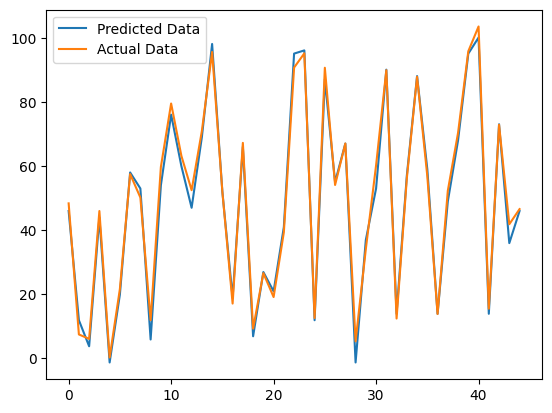

In [31]:
plt.plot(y_preds, label="Predicted Data")
plt.plot(y_test, label="Actual Data")

plt.legend()
plt.show()